PRE PROCESSING

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
review = pd.read_csv('/content/review hotel grand darmo suite.csv', sep=';', on_bad_lines='skip')

review.head()

,text
0,"""sukaa banget staycation disini..uda ada kolam..."
1,makanannya juga enak enaaak..city view dari la...
2,"Hotelnya nyaman, kamarnya bersih, kasur ukuran..."
3,"Kqmar luas dan bersih ,deket taman bungkul ,ba..."
4,tempat yg sangat bagus untuk beristirahat


In [ ]:
# ------ Case Folding --------
review['Text Case Folding'] = review['text'].str.lower()


print('Case Folding Result : \n')
print(review['Text Case Folding'].head(5))
print('\n\n\n')

Case Folding Result : 

0    "sukaa banget staycation disini..uda ada kolam...
1    makanannya juga enak enaaak..city view dari la...
2    hotelnya nyaman, kamarnya bersih, kasur ukuran...
3    kqmar luas dan bersih ,deket taman bungkul ,ba...
4            tempat yg sangat bagus untuk beristirahat
Name: Text Case Folding, dtype: object






In [ ]:
#TOKENIZING

!pip install nltk
import nltk
nltk.download('punkt_tab')
import string
import re  # regex library
from nltk.tokenize import word_tokenize

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, and backslash
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    # remove non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

# Change 'Review' to 'reviews' to match the actual column name
review['Text Case Folding'] = review['text'].apply(remove_tweet_special)

# remove number
def remove_number(text):
    return re.sub(r"\d+", "", text)

review['Text Case Folding'] = review['Text Case Folding'].apply(remove_number)

# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

review['Text Case Folding'] = review['Text Case Folding'].apply(remove_punctuation)

# remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

review['Text Case Folding'] = review['Text Case Folding'].apply(remove_whitespace_LT)

# remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

review['Text Case Folding'] = review['Text Case Folding'].apply(remove_whitespace_multiple)

# remove single character
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

review['Text Case Folding'] = review['Text Case Folding'].apply(remove_singl_char)

# tokenizing
def word_tokenize_wrapper(text):
    return word_tokenize(text)

review['Text Tokenizing'] = review['Text Case Folding'].apply(word_tokenize_wrapper)

# hasil
print('Tokenizing Result : \n')
print(review['Text Tokenizing'].head())
print('\n\n\n')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Tokenizing Result : 

0    [sukaa, banget, staycation, disiniuda, ada, ko...
1    [makanannya, juga, enak, enaaakcity, view, dar...
2    [Hotelnya, nyaman, kamarnya, bersih, kasur, uk...
3    [Kqmar, luas, dan, bersih, deket, taman, bungk...
4     [tempat, yg, sangat, bagus, untuk, beristirahat]
Name: Text Tokenizing, dtype: object






In [ ]:
#NORMALIZATION
# Load kamus kata baku
normalizad_word = pd.read_excel("kamuskatabaku.xlsx")

# Membuat dictionary dari kamus
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

# Fungsi normalisasi kata
def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# Terapkan ke dataframe review
review['Text Normalization'] = review['Text Tokenizing'].apply(normalized_term)

# Lihat hasil
print(review[['Text Tokenizing', 'Text Normalization']].head())

                                     Text Tokenizing  \
0  [sukaa, banget, staycation, disiniuda, ada, ko...   
1  [makanannya, juga, enak, enaaakcity, view, dar...   
2  [Hotelnya, nyaman, kamarnya, bersih, kasur, uk...   
3  [Kqmar, luas, dan, bersih, deket, taman, bungk...   
4   [tempat, yg, sangat, bagus, untuk, beristirahat]   

                                  Text Normalization  
0  [suka, banget, staycation, disiniuda, ada, kol...  
1  [makanannya, juga, enak, enaaakcity, view, dar...  
2  [Hotelnya, nyaman, kamarnya, bersih, kasur, uk...  
3  [Kqmar, luas, dan, bersih, dekat, taman, bungk...  
4  [tempat, yang, sangat, bagus, untuk, beristira...  


In [ ]:
#STEMMING

!pip install Sastrawi
!pip install swifter

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# fungsi stem
def stemmed_wrapper(term):
    return stemmer.stem(term)

# buat dictionary untuk simpan hasil stem
term_dict = {}

# isi dictionary dengan kata dari kolom Text Normalization
for document in review['Text Normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(f"Total kata unik: {len(term_dict)}")
print("------------------------")

# proses stemming tiap term
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(f"{term} : {term_dict[term]}")

print("------------------------")
print("Contoh dictionary hasil stemming:")
print(dict(list(term_dict.items())[:10]))  # tampilkan 10 contoh pertama

# apply stemmed term ke dataframe review
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

review['Text Stemming'] = review['Text Normalization'].swifter.apply(get_stemmed_term)

# tampilkan hasil stemming
print(review[['Text Normalization', 'Text Stemming']].head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=89865124e80084e11b4552a99e415786f1d675640db6345b964083d770c17897
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter
Total kata unik: 4887
------------------------
suka : suka
banget : banget
staycation : staycation
disiniuda : disiniuda
ada : ada
kolam : kolam
renang : renang
dan : dan
dekat : dekat
sama : sama
taman : taman
bungkultinggal : bungkultinggal
jalan : jalan
kaki : kaki
bisa : bisa
ikutan : ikut
CFD : cfd
kalau : kalau
weekend : weekend
makanannya : makan
juga : juga
enak : enak
enaaakcity : enaaakcity
view : view
dari : dari
lantai : lantai
paling : paling
atas : atas
cakep : cakep
Hotelnya : hotel
nyaman : nyaman
kamarnya : kamar
bersih : bersih
kasur : kasur
ukuran : ukur
besar : besar


Pandas Apply:   0%|          | 0/1780 [00:00<?, ?it/s]

                                  Text Normalization  \
0  [suka, banget, staycation, disiniuda, ada, kol...   
1  [makanannya, juga, enak, enaaakcity, view, dar...   
2  [Hotelnya, nyaman, kamarnya, bersih, kasur, uk...   
3  [Kqmar, luas, dan, bersih, dekat, taman, bungk...   
4  [tempat, yang, sangat, bagus, untuk, beristira...   

                                       Text Stemming  
0  [suka, banget, staycation, disiniuda, ada, kol...  
1  [makan, juga, enak, enaaakcity, view, dari, la...  
2  [hotel, nyaman, kamar, bersih, kasur, ukur, be...  
3  [kqmar, luas, dan, bersih, dekat, taman, bungk...  
4    [tempat, yang, sangat, bagus, untuk, istirahat]  


In [ ]:
#FILTERING
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken',
                       'allah', 'brb', 'btw', 'b/c', 'cod', 'cmiiw', 'fyi',
                       'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao', 'oot',
                       'pap', 'otw', 'tfl', 'vc', 'ygy', 'tbtb','kqmar', 'enaaakcity','disiniuda','shg', 'di', 'is',
                       ])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwordbahasa.txt", names=["stopwords"], header=None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------
# convert list to set for faster lookup
list_stopwords = set(list_stopwords)

# remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

# terapkan pada dataframe review
review['Preprocessing'] = review['Text Stemming'].apply(stopwords_removal)

# tampilkan hasil
print(review['Preprocessing'].head())

0    [suka, banget, staycation, kolam, renang, bang...
1                   [makan, enak, view, lantai, cakep]
2    [hotel, nyaman, kamar, bersih, kasur, ukur, ma...
3              [luas, bersih, taman, bungkul, kuliner]
4                                   [bagus, istirahat]
Name: Preprocessing, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
review.head()

,text,Text Case Folding,Text Tokenizing,Text Normalization,Text Stemming,Preprocessing
0,"""sukaa banget staycation disini..uda ada kolam...",sukaa banget staycation disiniuda ada kolam re...,"[sukaa, banget, staycation, disiniuda, ada, ko...","[suka, banget, staycation, disiniuda, ada, kol...","[suka, banget, staycation, disiniuda, ada, kol...","[suka, banget, staycation, kolam, renang, bang..."
1,makanannya juga enak enaaak..city view dari la...,makanannya juga enak enaaakcity view dari lant...,"[makanannya, juga, enak, enaaakcity, view, dar...","[makanannya, juga, enak, enaaakcity, view, dar...","[makan, juga, enak, enaaakcity, view, dari, la...","[makan, enak, view, lantai, cakep]"
2,"Hotelnya nyaman, kamarnya bersih, kasur ukuran...",Hotelnya nyaman kamarnya bersih kasur ukuran b...,"[Hotelnya, nyaman, kamarnya, bersih, kasur, uk...","[Hotelnya, nyaman, kamarnya, bersih, kasur, uk...","[hotel, nyaman, kamar, bersih, kasur, ukur, be...","[hotel, nyaman, kamar, bersih, kasur, ukur, ma..."
3,"Kqmar luas dan bersih ,deket taman bungkul ,ba...",Kqmar luas dan bersih deket taman bungkul bany...,"[Kqmar, luas, dan, bersih, deket, taman, bungk...","[Kqmar, luas, dan, bersih, dekat, taman, bungk...","[kqmar, luas, dan, bersih, dekat, taman, bungk...","[luas, bersih, taman, bungkul, kuliner]"
4,tempat yg sangat bagus untuk beristirahat,tempat yg sangat bagus untuk beristirahat,"[tempat, yg, sangat, bagus, untuk, beristirahat]","[tempat, yang, sangat, bagus, untuk, beristira...","[tempat, yang, sangat, bagus, untuk, istirahat]","[bagus, istirahat]"


In [ ]:
df= review.drop(columns=['text', 'Text Case Folding', 'Text Tokenizing', 'Text Normalization', 'Text Stemming'])
df.head()

,Preprocessing
0,"[suka, banget, staycation, kolam, renang, bang..."
1,"[makan, enak, view, lantai, cakep]"
2,"[hotel, nyaman, kamar, bersih, kasur, ukur, ma..."
3,"[luas, bersih, taman, bungkul, kuliner]"
4,"[bagus, istirahat]"


In [ ]:
df.to_csv("preprocessing_results.csv", index=False)

In [ ]:
import pandas as pd
import ast


df = pd.read_csv('/content/preprocessing_results.csv')

# Ubah dari string list ke list Python → gabung jadi string
df['text_bersih'] = df['Preprocessing'].apply(lambda x: ' '.join(ast.literal_eval(x)))

In [ ]:
df[['text_bersih']].to_csv('text_bersih.csv', index=False)

BERTopic

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/text_bersih.csv', sep=';', on_bad_lines='skip')
data.head()

,text_bersih
0,suka banget staycation kolam renang banget tam...
1,makan enak view lantai cakep
2,hotel nyaman kamar bersih kasur ukur makan ena...
3,luas bersih taman bungkul kuliner
4,bagus istirahat


In [ ]:
!pip install bertopic

In [ ]:
# Choose an embedding backend
!pip install bertopic[flair, gensim, spacy, use]

# Topic modeling with images
!pip install bertopic[vision]

ERROR: Invalid requirement: 'bertopic[flair,': Expected extra name after comma
    bertopic[flair,
                   ^


In [ ]:
!pip install gensim

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = data['text_bersih'].astype(str).tolist()

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [ ]:
df_topics = topic_model.get_topic_info()
df_filtered = df_topics[df_topics['Topic'].between(-1, 10)]
df_filtered

,Topic,Count,Name,Representation,Representative_Docs
0,-1,327,-1_bersih_kamar_layan_ramah,"[bersih, kamar, layan, ramah, habis, nyaman, r...",[kamar bagus luas bersih muas sayang lobby wel...
1,0,354,0_hotel_surabaya_darmo_grand,"[hotel, surabaya, darmo, grand, kamar, bintang...","[hotel nyaman lokasi strategis taman bungkul, ..."
2,1,83,1_good_the_nice_room,"[good, the, nice, room, place, service, locati...",[good hotel good price good service good exper...
3,2,82,2_bersih_kamar_luas_kotor,"[bersih, kamar, luas, kotor, remang, lumayan, ...","[kamar bersih, kamar bersih, kamar bersih nyam..."
4,3,73,3_strategis_lokasi_taman_bungkul,"[strategis, lokasi, taman, bungkul, ramah, ban...","[lokasi strategis, lokasi strategis, lokasi st..."
5,4,54,4_menu_breakfast_enak_pilih,"[menu, breakfast, enak, pilih, makan, sarap, v...","[breakfast, menu makan, menu enak]"
6,5,50,5_bagus_layan_view_lumayan,"[bagus, layan, view, lumayan, bersih, luas, ka...","[bersih bagus, layan bagus kamar bagus, bagus ..."
7,6,39,6_jam_sore_tunggu_check,"[jam, sore, tunggu, check, cek, masuk, telp, r...","[jam checkin jam tunggu jam masuk, layan check..."
8,7,38,7_microwave_kulkas_kamar_lengkap,"[microwave, kulkas, kamar, lengkap, luas, fasi...",[fasilitas kamar lengkap microwave kulkas dll ...
9,8,37,8_staff_mbak_ramah_bantu,"[staff, mbak, ramah, bantu, staffnya, oke, ber...","[staff ramah layan mbak indri makan oke, kamar..."


In [ ]:
topic_model.get_topics()

{-1: [('bersih', 0.024591089584017466),
  ('kamar', 0.024349593782819787),
  ('layan', 0.021339441232692116),
  ('ramah', 0.02099749934727516),
  ('habis', 0.017815272506895817),
  ('nyaman', 0.01780357375568504),
  ('renang', 0.017025664772772668),
  ('pas', 0.01649868679123019),
  ('anak', 0.015835585576911275),
  ('fasilitas', 0.015510928870434239)],
 0: [('hotel', 0.04666332590874447),
  ('surabaya', 0.020499247676914325),
  ('darmo', 0.019889947059582126),
  ('grand', 0.019731842601125035),
  ('kamar', 0.01825453959166254),
  ('bintang', 0.017810327558814915),
  ('ramah', 0.017605458777958067),
  ('makan', 0.016390804966455348),
  ('nyaman', 0.01634534041126703),
  ('layan', 0.01563560095674056)],
 1: [('good', 0.17237372729493314),
  ('the', 0.08157714917743918),
  ('nice', 0.07396465134149408),
  ('room', 0.0711160300319448),
  ('place', 0.06774941848780881),
  ('service', 0.06721803126546949),
  ('location', 0.059858024317293264),
  ('clean', 0.04907266173390986),
  ('experienc

In [ ]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,suka banget staycation kolam renang banget tam...,9,9_bungkul_taman_cfd_kota,"[bungkul, taman, cfd, kota, jalan, kuliner, me...","[lokasi oke kota minggu cfd bungkul, nyaman ta...",bungkul - taman - cfd - kota - jalan - kuliner...,0.660531,False
1,makan enak view lantai cakep,14,14_makan_enak_mudah_padu,"[makan, enak, mudah, padu, goda, pa, seram, ke...","[makan enak kecewa, enak, makan enak]",makan - enak - mudah - padu - goda - pa - sera...,1.000000,False
2,hotel nyaman kamar bersih kasur ukur makan ena...,0,0_hotel_surabaya_darmo_grand,"[hotel, surabaya, darmo, grand, kamar, bintang...","[hotel nyaman lokasi strategis taman bungkul, ...",hotel - surabaya - darmo - grand - kamar - bin...,1.000000,False
3,luas bersih taman bungkul kuliner,-1,-1_bersih_kamar_layan_ramah,"[bersih, kamar, layan, ramah, habis, nyaman, r...",[kamar bagus luas bersih muas sayang lobby wel...,bersih - kamar - layan - ramah - habis - nyama...,0.000000,False
4,bagus istirahat,11,11_bagus_etnik_bagusss_retro,"[bagus, etnik, bagusss, retro, agam, estetik, ...","[bagus, bagus, bagus]",bagus - etnik - bagusss - retro - agam - estet...,0.198131,False
...,...,...,...,...,...,...,...,...
1619,view good service oke weekend padat ampun,-1,-1_bersih_kamar_layan_ramah,"[bersih, kamar, layan, ramah, habis, nyaman, r...",[kamar bagus luas bersih muas sayang lobby wel...,bersih - kamar - layan - ramah - habis - nyama...,0.000000,False
1620,room nyaman,-1,-1_bersih_kamar_layan_ramah,"[bersih, kamar, layan, ramah, habis, nyaman, r...",[kamar bagus luas bersih muas sayang lobby wel...,bersih - kamar - layan - ramah - habis - nyama...,0.000000,False
1621,mantab,17,17_mantap_mantab_super_keren,"[mantap, mantab, super, keren, topp, rmb, mark...","[mantap, mantap, mantap]",mantap - mantab - super - keren - topp - rmb -...,0.778975,False
1622,kuliner hotel manja lidah mata service hotel p...,0,0_hotel_surabaya_darmo_grand,"[hotel, surabaya, darmo, grand, kamar, bintang...","[hotel nyaman lokasi strategis taman bungkul, ...",hotel - surabaya - darmo - grand - kamar - bin...,1.000000,False


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import nltk

# Download tokenizer (hanya sekali)
nltk.download('punkt_tab')

def calculate_bertopic_coherence(model, docs_cleaned, top_n_words=10, coherence_type='c_v'):
    """
    Hitung coherence score dari model BERTopic menggunakan gensim CoherenceModel.

    Parameters:
    - model: BERTopic instance
    - docs_cleaned: list of preprocessed documents (list of strings)
    - top_n_words: jumlah kata teratas tiap topik yang akan digunakan
    - coherence_type: jenis coherence, misalnya 'c_v', 'u_mass', 'c_uci', 'c_npmi'

    Returns:
    - coherence_score: float
    """

    # Tokenisasi dokumen
    tokenized_docs = [word_tokenize(doc) for doc in docs_cleaned]

    # Ambil topik-topik dari model
    topics = model.get_topics()
    topic_words = []

    for topic_id in topics:
        if topic_id == -1:  # Skip outliers
            continue
        words = [word for word, _ in topics[topic_id][:top_n_words]]
        topic_words.append(words)

    # Siapkan dictionary dan corpus
    dictionary = Dictionary(tokenized_docs)
    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence=coherence_type
    )

    coherence_score = coherence_model.get_coherence()
    return coherence_score

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
coherence = calculate_bertopic_coherence(
    model=topic_model,
    docs_cleaned=data['text_bersih'],  # pastikan ini sudah preprocessed
    top_n_words=10,
    coherence_type='c_v'
)

print(f"Coherence Score (c_v): {coherence:.4f}")


Coherence Score (c_v): 0.4772


LDA (Latent Dirichlet Allocation)

In [ ]:
!pip install gensim

In [ ]:
from gensim import corpora

# Tokenisasi
tokeize_article = data['text_bersih'].apply(lambda x: str(x).split())

# Membuat kamus (dictionary)
id2word = corpora.Dictionary(tokeize_article)

# Corpus: BoW
corpus = [id2word.doc2bow(text) for text in tokeize_article]

# Contoh hasil
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
corpus_example[0][:50]

[('banget', 2),
 ('bungkultinggal', 1),
 ('cfd', 1),
 ('jalan', 1),
 ('kaki', 1),
 ('kolam', 1),
 ('renang', 1),
 ('staycation', 1),
 ('suka', 1),
 ('taman', 1),
 ('weekend', 1)]

In [ ]:
import gensim

# build LDA model for 10 topic
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.075*"kamar" + 0.060*"mandi" + 0.039*"air" + 0.037*"masuk" + 0.031*"good" + 0.027*"ac" + 0.020*"shower" + 0.019*"dingin" + 0.018*"service" + 0.017*"lantai"'), (1, '0.104*"hotel" + 0.062*"bersih" + 0.060*"kamar" + 0.053*"layan" + 0.044*"nyaman" + 0.040*"ramah" + 0.040*"bagus" + 0.030*"makan" + 0.028*"strategis" + 0.026*"check"'), (2, '0.083*"jam" + 0.066*"kamar" + 0.046*"harga" + 0.043*"tunggu" + 0.025*"malam" + 0.021*"sesuai" + 0.018*"ruang" + 0.018*"kotor" + 0.017*"jangkau" + 0.016*"bawa"'), (3, '0.067*"room" + 0.031*"nice" + 0.030*"not" + 0.030*"bed" + 0.028*"the" + 0.026*"but" + 0.022*"clean" + 0.020*"tidur" + 0.019*"tinggal" + 0.018*"kasihan"'), (4, '0.009*"tradisional" + 0.005*"classic" + 0.004*"nuansa" + 0.004*"makananya" + 0.004*"modern" + 0.002*"jadul" + 0.001*"denggan" + 0.001*"padu" + 0.001*"bincang" + 0.001*"santa"'), (5, '0.092*"kamar" + 0.057*"fasilitas" + 0.042*"lengkap" + 0.037*"lumayan" + 0.030*"sedia" + 0.026*"microwave" + 0.025*"pesan" + 0.024*"kecewa" + 0.023*

In [ ]:
# Cetak setiap topik satu per baris
for idx, topic in lda_model.print_topics():
    print(f"Topik {idx + 1}:")
    print(topic)
    print("-" * 80)

Topik 1:
0.075*"kamar" + 0.060*"mandi" + 0.039*"air" + 0.037*"masuk" + 0.031*"good" + 0.027*"ac" + 0.020*"shower" + 0.019*"dingin" + 0.018*"service" + 0.017*"lantai"
--------------------------------------------------------------------------------
Topik 2:
0.104*"hotel" + 0.062*"bersih" + 0.060*"kamar" + 0.053*"layan" + 0.044*"nyaman" + 0.040*"ramah" + 0.040*"bagus" + 0.030*"makan" + 0.028*"strategis" + 0.026*"check"
--------------------------------------------------------------------------------
Topik 3:
0.083*"jam" + 0.066*"kamar" + 0.046*"harga" + 0.043*"tunggu" + 0.025*"malam" + 0.021*"sesuai" + 0.018*"ruang" + 0.018*"kotor" + 0.017*"jangkau" + 0.016*"bawa"
--------------------------------------------------------------------------------
Topik 4:
0.067*"room" + 0.031*"nice" + 0.030*"not" + 0.030*"bed" + 0.028*"the" + 0.026*"but" + 0.022*"clean" + 0.020*"tidur" + 0.019*"tinggal" + 0.018*"kasihan"
--------------------------------------------------------------------------------
Topik 5:

In [ ]:
!pip install pyLDAvis

In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.351212 -0.155907       1        1  34.477564
0     -0.080812  0.151553       2        1  12.509468
9      0.056126 -0.275207       3        1  12.303768
5     -0.110695  0.156905       4        1  11.995567
2     -0.089331  0.115729       5        1  10.837289
3      0.131438 -0.005338       6        1   5.565448
7      0.107503 -0.007534       7        1   4.465233
6      0.121969  0.006892       8        1   4.047253
8      0.118673  0.003201       9        1   3.568195
4      0.096341  0.009705      10        1   0.230215, topic_info=         Term        Freq       Total Category  logprob  loglift
17      hotel  513.000000  513.000000  Default  30.0000  30.0000
19      kamar  694.000000  694.000000  Default  29.0000  29.0000
16     bersih  306.000000  306.000000  Default  28.0000  28.0000
24    bungkul  146.000000  146.000000  Default  27.0000  27.0000
9       taman  141.000000  141.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1847    warna    0.012999    1.014826  Topic10  -7.8403   1.7163
1843  nyalain    0.012358    1.019551  Topic10  -7.8908   1.6611
2477    usung    0.012284    2.196342  Topic10  -7.8968   0.8877
233     betah    0.011854    1.055806  Topic10  -7.9325   1.5845
2224    megah    0.011929    3.661526  Topic10  -7.9262   0.3472

[368 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
135       2  0.986919          ac
928       7  0.953324       acara
1734      8  0.851828      access
1038      6  0.916581  affordable
74        2  0.992174         air
...     ...       ...         ...
1012      9  0.666862       water
10        3  0.949293     weekend
442       5  0.941513     welcome
413       3  0.947877      wisata
895       8  0.948085         you

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 10, 6, 3, 4, 8, 7, 9, 5])

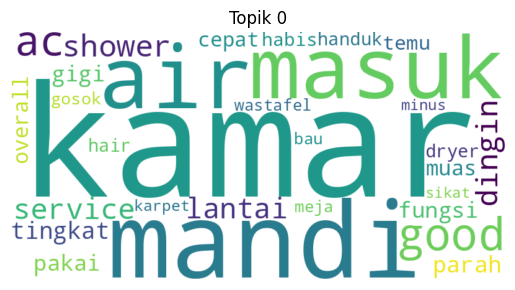

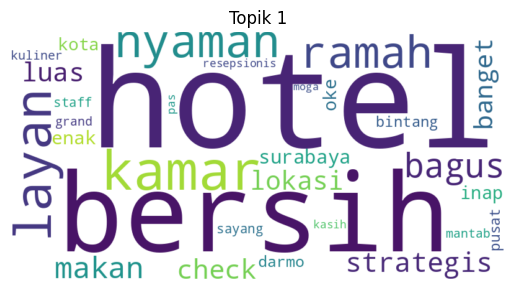

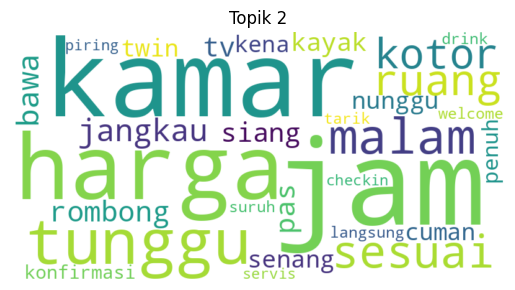

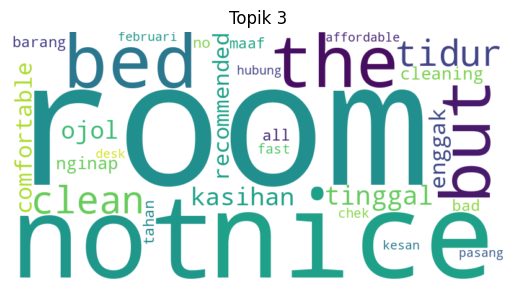

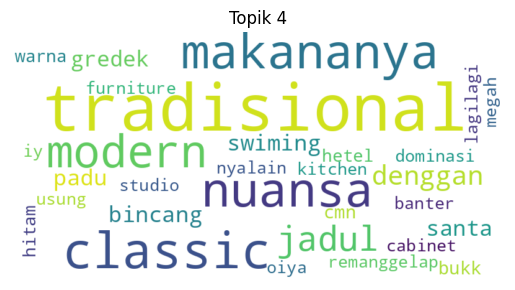

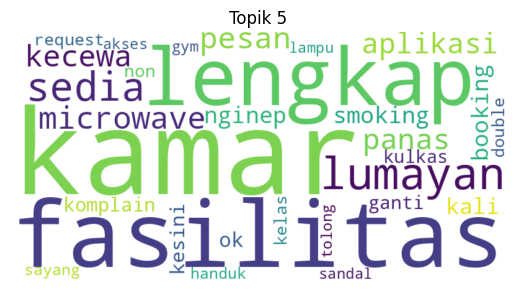

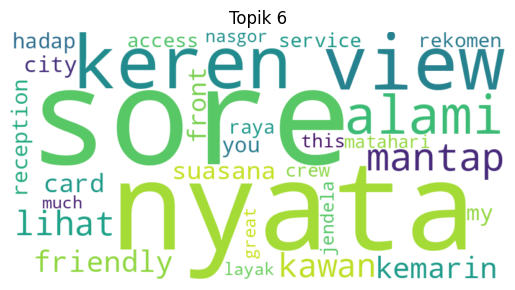

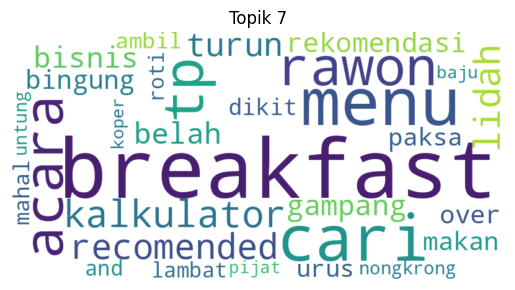

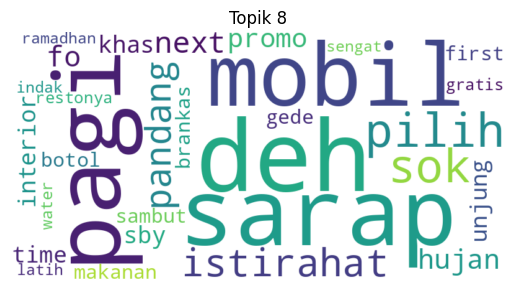

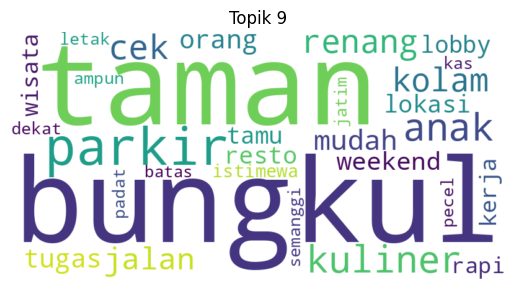

In [ ]:
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for t in range(lda_model.num_topics):
    plt.figure()
    plt.title(f"Topik {t}")

    # Ambil kata dan probabilitas dari topik ke-t
    topic_terms = lda_model.show_topic(t, topn=30)
    topic_words = {word: weight for word, weight in topic_terms}

    # Buat dan tampilkan WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

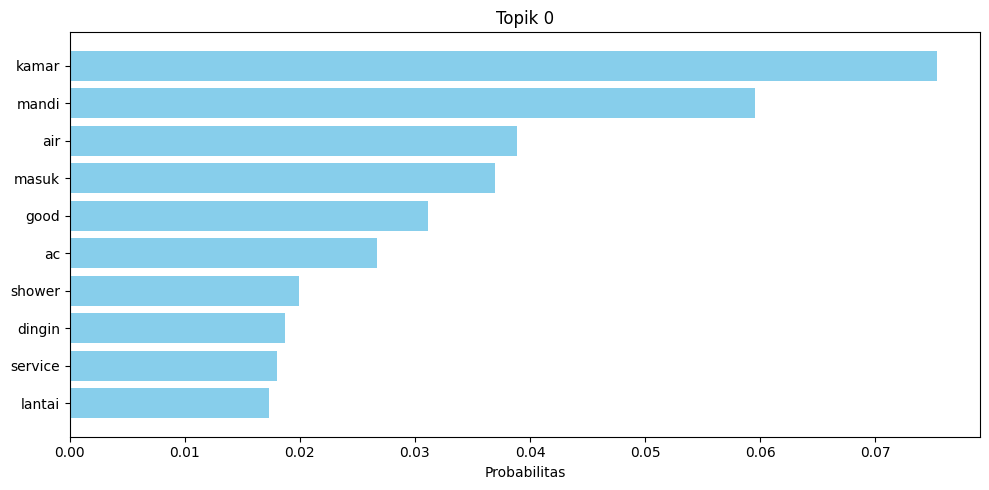

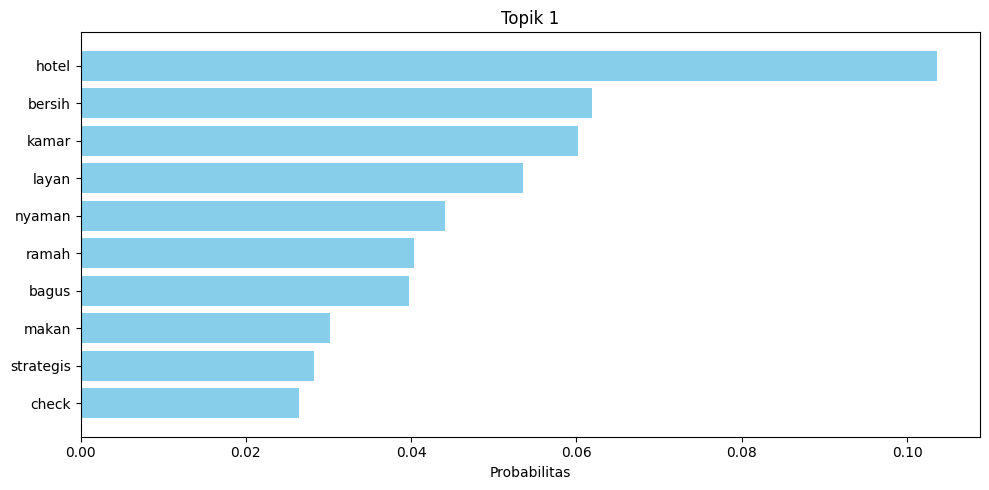

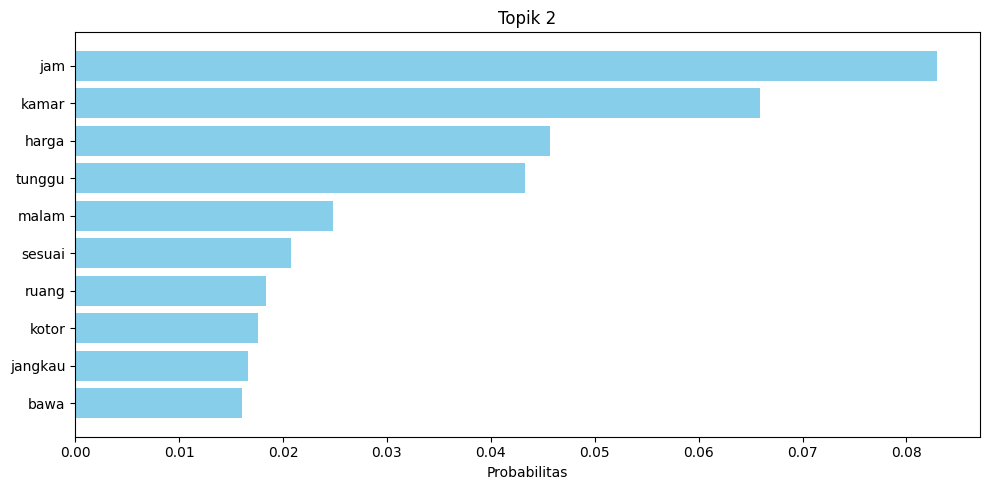

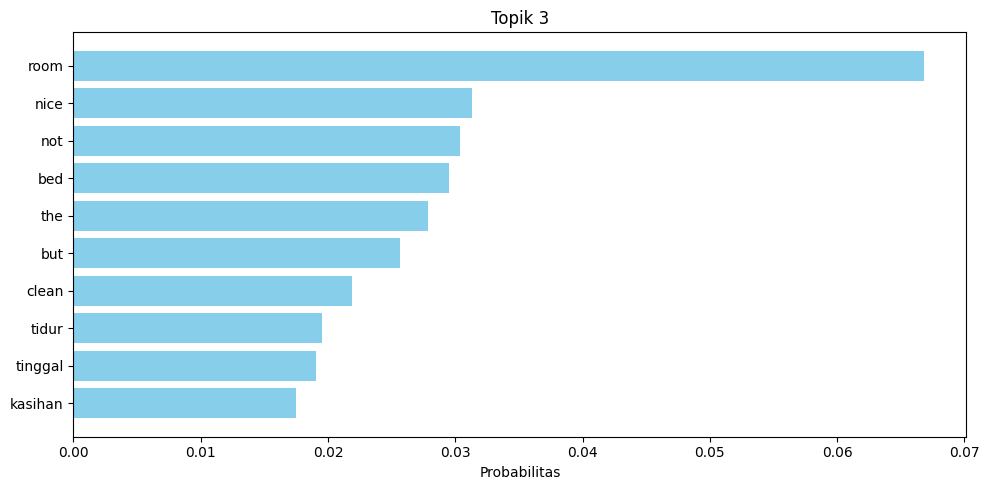

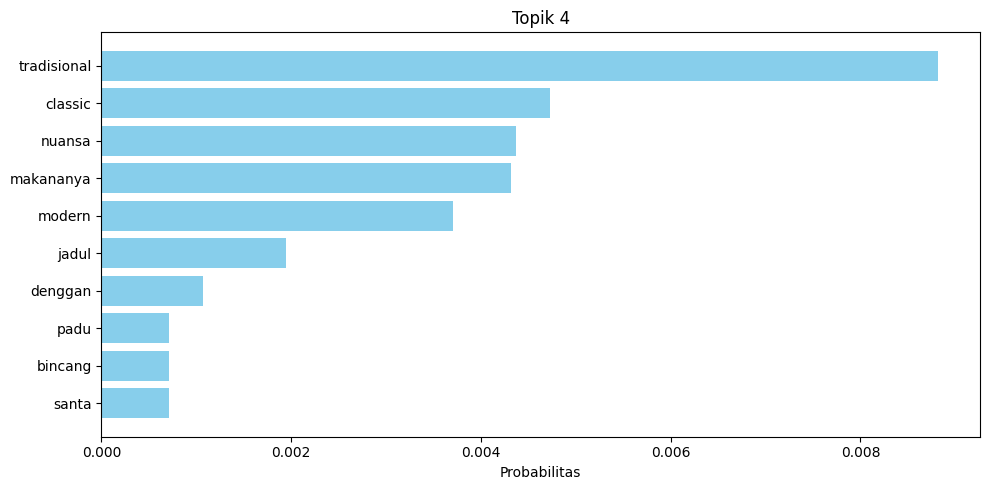

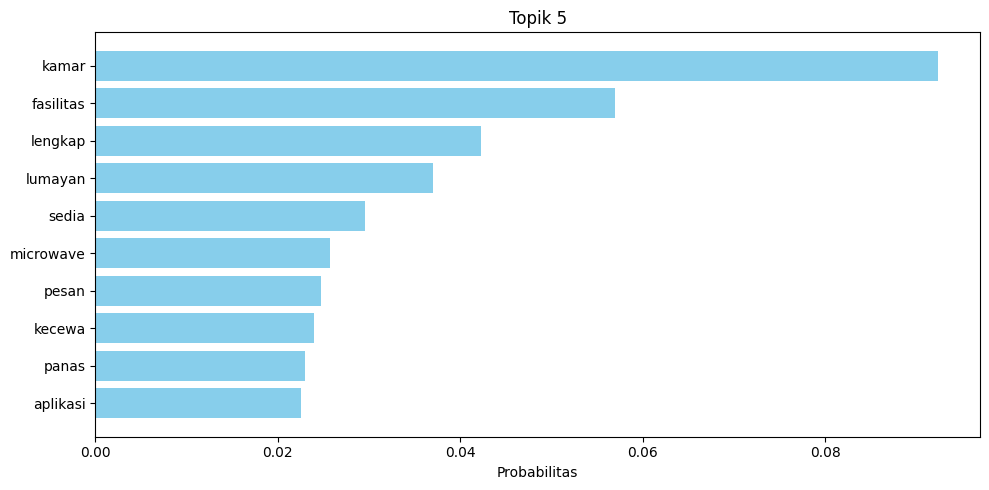

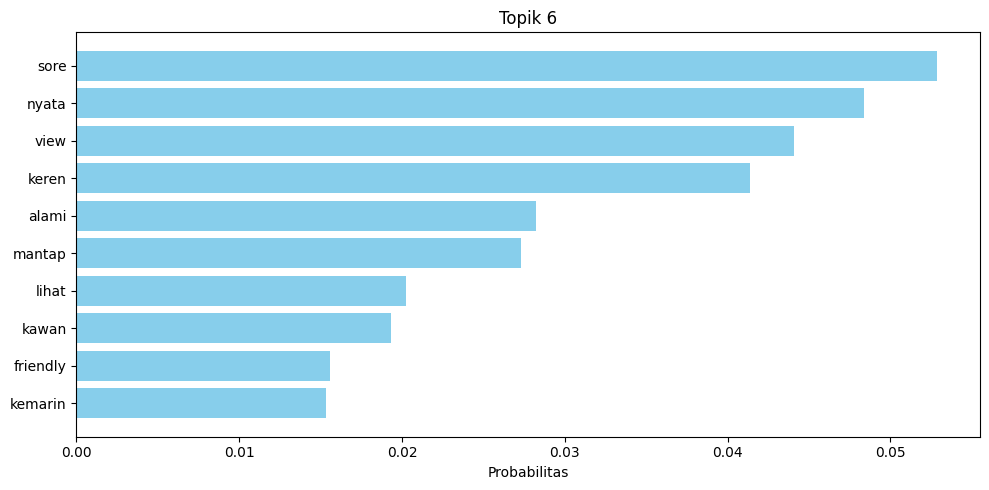

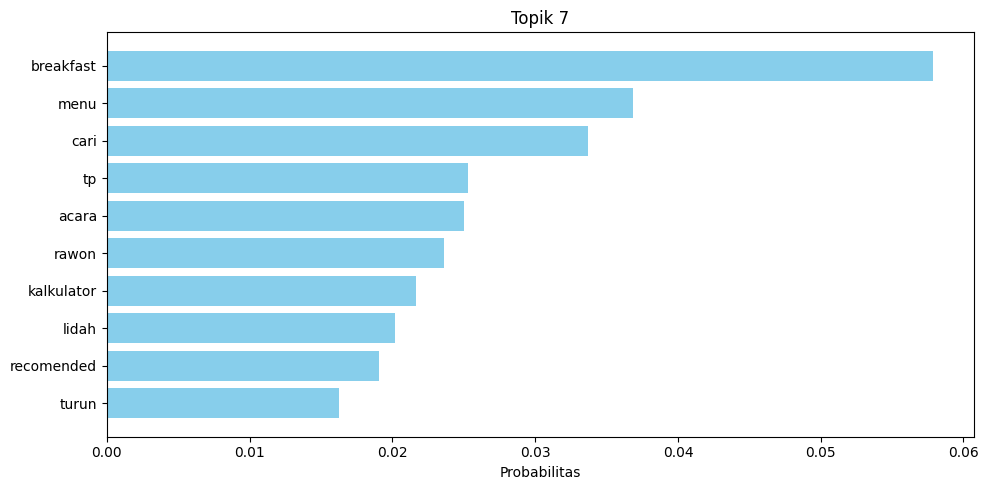

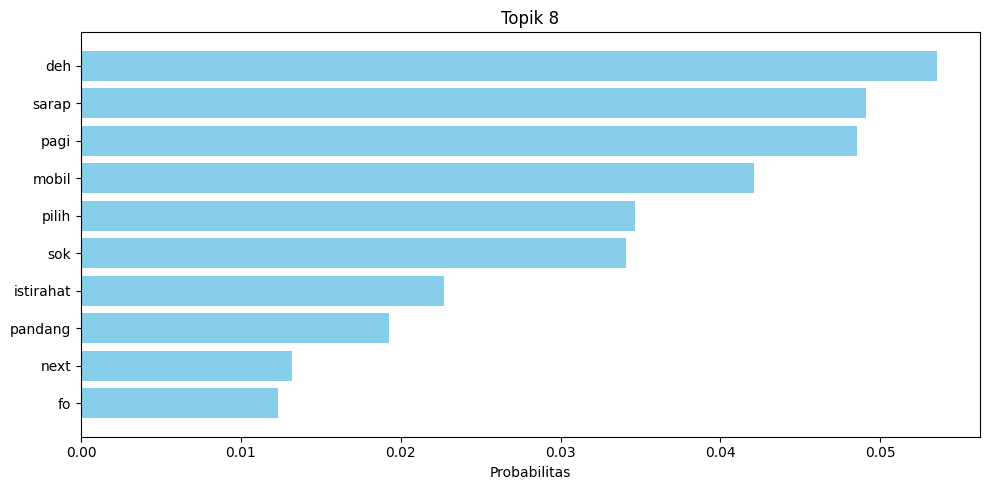

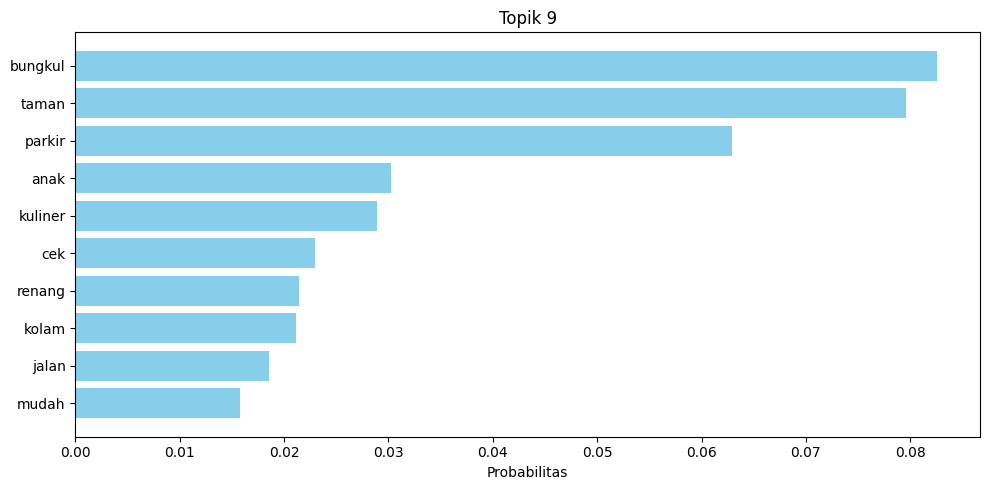

In [ ]:
for topic_id in range(lda_model.num_topics):
    words_probs = lda_model.show_topic(topic_id, topn=10)
    words = [word for word, prob in words_probs]
    probs = [prob for word, prob in words_probs]

    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], probs[::-1], color='skyblue')  # Balik agar urut dari atas
    plt.xlabel("Probabilitas")
    plt.title(f"Topik {topic_id}")
    plt.tight_layout()
    plt.show()

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity : ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -7.4405604800358836

Coherence Score:  0.4234728814705228


Analisis Sentimen

In [ ]:
data['text_bersih'] = data['text_bersih'].apply(lambda x: x.split())

In [ ]:
#Labeling Using Inset Lexicon
lexicon_positive = pd.read_excel('/content/kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('/content/kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive_dict:
            score += lexicon_positive_dict[word]
        elif word in lexicon_negative_dict:
            score += lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
      sentimen = 'Positive'
    else:
      sentimen = 'Negative'
    return score, sentimen

results = data['text_bersih'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['Polarity Score'] = results[0]
data['Sentimen'] = results[1]
#data['sentimen'] = results[1]
#data

data[['text_bersih','Polarity Score','Sentimen']]

,text_bersih,Polarity Score,Sentimen
0,"[suka, banget, staycation, kolam, renang, bang...",4,Positive
1,"[makan, enak, view, lantai, cakep]",11,Positive
2,"[hotel, nyaman, kamar, bersih, kasur, ukur, ma...",16,Positive
3,"[luas, bersih, taman, bungkul, kuliner]",8,Positive
4,"[bagus, istirahat]",8,Positive
...,...,...,...
1619,"[view, good, service, oke, weekend, padat, ampun]",8,Positive
1620,"[room, nyaman]",4,Positive
1621,[mantab],0,Negative
1622,"[kuliner, hotel, manja, lidah, mata, service, ...",11,Positive


In [ ]:
data.to_excel('hasil sentimen.xlsx', index = False)

In [ ]:
inset_counts = data['Sentimen'].value_counts()
inset_counts

,count
Sentimen,
Positive,1268
Negative,356


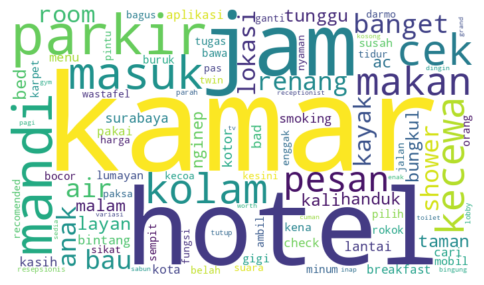

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=data[data['Sentimen']=='Negative']
words = ' '.join([' '.join(x) for x in new_df['text_bersih']])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

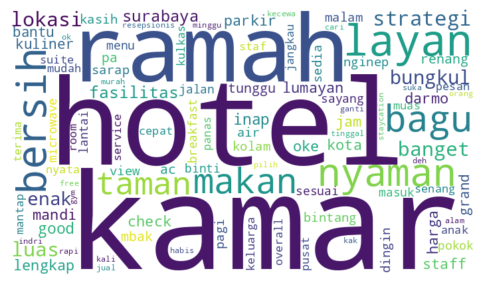

In [ ]:
new_df=data[data['Sentimen']=='Positive']
words = ' '.join([' '.join(x) for x in new_df['text_bersih']])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
X = data["text_bersih"]
y = data["Sentimen"]

In [ ]:
#Split data 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

Train Data: 1299
Test Data: 325


In [ ]:
#TRANSFORMASI DATASET
# Join the list of tokens into strings for X_train and X_test
X_train_joined = [" ".join(text) for text in X_train]
X_test_joined = [" ".join(text) for text in X_test]

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

tfidf_vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('indonesian'))
# Apply TfidfVectorizer to the joined text data
response = tfidf_vectorizer.fit_transform(X_train_joined)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Transformasi dataset
X_train_tfidf = tfidf_vectorizer.transform(X_train_joined)
X_test_tfidf  = tfidf_vectorizer.transform(X_test_joined)
print(f'Inset TF IDF Data Transformed.')

Inset TF IDF Data Transformed.


Confusion matrix: 
 [[ 46  18]
 [ 13 248]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.78      0.72      0.75        64
    Positive       0.93      0.95      0.94       261

    accuracy                           0.90       325
   macro avg       0.86      0.83      0.84       325
weighted avg       0.90      0.90      0.90       325

SVM Classifier Accuracy: 0.90


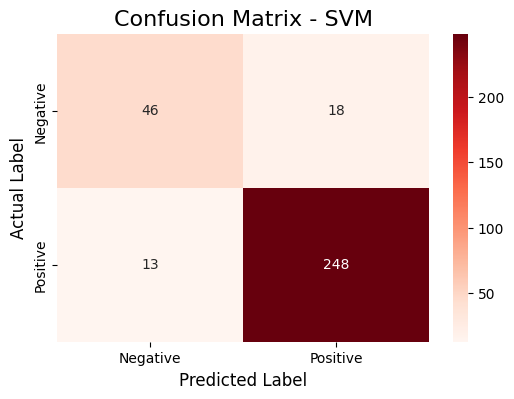

In [ ]:
#SVM (Support Vector Machine)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC # Import the SVM classifier

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear') # You can choose different kernels
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Now you can use y_pred_svm in the rest of your code
cm = confusion_matrix(y_test, y_pred_svm)
cr = classification_report(y_test, y_pred_svm)
svm_acc = accuracy_score(y_test, y_pred_svm)

print('Confusion matrix: \n', cm)
print('Classification report: \n', cr)
print(f'SVM Classifier Accuracy: {svm_acc:.2f}')

# Plot confusion matrix
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative', 'Positive'] # Correcting sentiment class labels based on value_counts output
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

Confusion matrix: 
 [[ 19  45]
 [  2 259]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.90      0.30      0.45        64
    Positive       0.85      0.99      0.92       261

    accuracy                           0.86       325
   macro avg       0.88      0.64      0.68       325
weighted avg       0.86      0.86      0.82       325

Naive Bayes Classifier Accuracy: 0.86


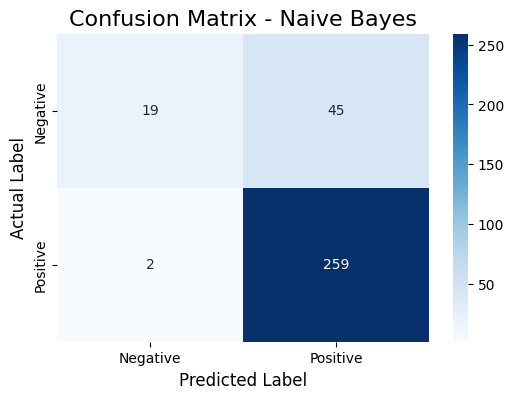

In [ ]:
#NAIVE BAYES
# === Naive Bayes Evaluation ===
from sklearn.naive_bayes import MultinomialNB # Import the Naive Bayes classifier

# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

cm_nb = confusion_matrix(y_test, y_pred_nb)
cr_nb = classification_report(y_test, y_pred_nb)
nb_acc = accuracy_score(y_test, y_pred_nb)

print('Confusion matrix: \n', cm_nb)
print('Classification report: \n', cr_nb)
print(f'Naive Bayes Classifier Accuracy: {nb_acc:.2f}')

# Plot confusion matrix
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative','Positive'] # Correcting sentiment labels
sns.heatmap(cm_nb, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix - Naive Bayes', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()